# UN Data Exploration Project

1. Download two CSV files and place them in the data folder of your local
Data Question 1 repository:

a. Gross Domestic Product (GDP) per capita:
http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY
.GDP.PCAP.PP.KD
• DO NOT APPLY ANY FILTERS
• rename the file to gdp_per_capita.csv
• open it with a text editor (not Excel) and take a look

b. Percentage of Individuals using the Internet:
http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H
• DO NOT APPLY ANY FILTERS
• rename the file to internet_use.csv
• open it with a text editor (not Excel) and take a look
## Done

2. Create a Jupyter Notebook in the notebooks folder and name it
UN_Data_Exploration.

• You are likely to get errors along the way. When you do, read the
errors to try to understand what is happening and how to correct it.
• Use markdown cells to record your answers to any questions asked
in this exercise. On the menu bar, you can toggle the cell type from
‘Code’ to ‘Markdown’. Here is a link to a cheat sheet showing the
basics of styling text using Markdown.

## Done

3. In the first cell of your notebook, import the required packages with their
customary aliases as follows:
    
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

Keep all imports in this cell at the top of your notebook.

4. At the bottom of your imports cell, use the %matplotlib inline magic
command so that your plots show in the notebook without having to call
plt.show() every time.

### Done

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
pd.options.display.max_rows = 999

5. Using the pandas read_csv() function, read the GDP dataset into your
notebook as a DataFrame called gdp_df.

• Take a look at the first 10 rows.

• Look at the last 5 rows. Do you see a problem?

• Redo the read_csv() call to correct this issue - do not modify the
original csv file.

### Done


In [21]:
gdp_df = pd.read_csv("../gdp_per_capita.csv")

In [22]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [23]:
gdp_df.tail()
#We have unneeded rows at the bottom, need to reread the data without these

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [24]:
gdp_df.shape

(6731, 4)

In [25]:
gdp_df = pd.read_csv("../gdp_per_capita.csv", nrows=6729)
#gdp_df = pd.read_csv("../gdp_per_capita.csv")[: -2]

In [26]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [27]:
gdp_df.shape
#We have the correct number of rows now

(6729, 4)

In [28]:
gdp_df.tail()
#And the data at the bottom looks good

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the ‘Value Footnotes’ column, and rename the remaining columns to
‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

### Done

In [29]:
gdp_df = gdp_df.drop(columns='Value Footnotes')

In [30]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

In [31]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


7. How many rows and columns does gdp_df have? What are the data types
of its columns? If any of the columns are not the expected types, figure
out why and fix it.<br>

Rows: 6729
Columns: 3<br>
Country or Area column is an object, is this okay?

### Question

In [32]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [119]:
gdp_df['Country'].value_counts()

Haiti                        29
IDA only                     29
Rwanda                       29
Marshall Islands             29
Comoros                      29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

8. Which years are represented in this dataset? Take a look at the number of
observations per year. What do you notice?<br>
Years: 1990-2018<br>
The number of areas reported on each year grows from 210 in 1990 to 243 in 2011, then drops to 226 in 2018.

### Done


In [118]:
gdp_df.groupby("Year")["Country"].count()

Year
1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Country, dtype: int64

In [99]:
print('Min Year: ' + str(gdp_df['Year'].min()))
print('Max Year: ' + str(gdp_df['Year'].max()))

Min Year: 1990
Max Year: 2018


9. How many countries are represented in this dataset? Which countries are
least represented in the dataset? Why do you think these countries have
so few observations?<br><br>
Countries: 243<br>
Countries with few values: Some of these have had civil wars in the affected time period, a few of the countries are new. Some are territories of other countries and may possibly have irregular reporting because of this.<br>
### Done


In [40]:
gdp_countries = gdp_df['Country'].value_counts()
print('**Head**')
print(gdp_countries.head())
print('**Tail**')
print(gdp_countries.tail(10))
gdp_countries.shape

**Head**
Haiti               29
IDA only            29
Rwanda              29
Marshall Islands    29
Comoros             29
Name: Country, dtype: int64
**Tail**
Palau                        19
Timor-Leste                  19
Kosovo                       19
SÃ£o TomÃ© and Principe      18
Afghanistan                  17
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, dtype: int64


(243,)

In [41]:
gdp_countries.sort_index()

Afghanistan            17
Albania                29
Algeria                29
Angola                 29
Antigua and Barbuda    29
                       ..
West Bank and Gaza     25
World                  29
Yemen                  29
Zambia                 29
Zimbabwe               29
Name: Country, Length: 243, dtype: int64

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call
this new dataframe gdp_2014.<br>
### Done

In [43]:
gdp_2014 = gdp_df[gdp_df['Year']==2014]
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


11. Use .describe() to find the summary statistics for GDP per capita in
2014.<br>
### Done

In [70]:
gdp_2014.describe()

,Year,Value
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish
to adjust the number of bins for your histogram). How would you describe
the shape of the distribution?<br>

The data is right skewed with the largest group of countries under $20K GDP.<br>
### Done


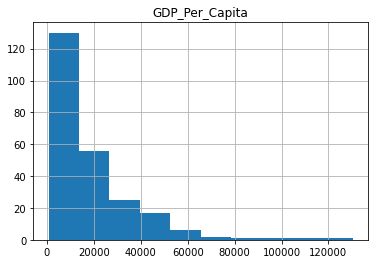

In [47]:
gdp_2014.hist('GDP_Per_Capita');

14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017
(using the pandas .pivot_table() method or another method) so that
each row corresponds to a country, each column corresponds to a year,
and the values in the table give the GDP_Per_Capita amount. Drop any
rows that are missing values for either 1990 or 2017. Save the result to a
dataframe named gdp_pivoted.<br>
### Done

In [53]:
gdp_pivoted = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2017)].pivot_table(values='GDP_Per_Capita',columns='Year',index='Country').dropna()

In [54]:
gdp_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, Albania to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    209 non-null    float64
 1   2017    209 non-null    float64
dtypes: float64(2)
memory usage: 4.9+ KB


In [55]:
gdp_pivoted.shape

(209, 2)

In [59]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104


In [ ]:
15. Create a new column in gdp_pivoted named Percent_Change. This
column should contain the percent change in GDP_Per_Capita from 1990
to 2017. Hint: Percent change is calculated as 100*(New Value - Old
Value) / Old Value.<br>
### Done

In [69]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


In [70]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


16. How many countries experienced a negative percent change in GDP per
capita from 1990 to 2017?<br>
Countries with negative change in GDP: 20<br>
### Done

In [73]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]

Year,1990,2017,Percent_Change
Country,,,
Aruba,37140.024657,35861.828118,-3.441561
Brunei,84693.336970,72523.729446,-14.369026
Burundi,1027.396660,670.777072,-34.710993
Central African Republic,982.659793,746.434942,-24.039332
Comoros,2580.500555,2555.966364,-0.950753
Congo,5323.022707,5103.142821,-4.130734
Dem. Rep. Congo,1386.933242,807.752905,-41.759785
Gabon,19556.665840,16144.935297,-17.445359
Guinea-Bissau,1633.612989,1576.748994,-3.480873


In [74]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].count()

Year
1990              20
2017              20
Percent_Change    20
dtype: int64

17. Which country had the highest % change in GDP per capita? Create a
line plot showing this country’s GDP per capita for all years from 1990
to 2017. Create another showing the country with the second highest %
change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.<br><br>
Highest % change in GDP: Equatorial Guinea<br>
Comparison: China has a steady rise whereas EG rises and falls again<br>
### Done


In [76]:
gdp_pivoted.sort_values('Percent_Change', ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
...,...,...,...
Ukraine,10463.959955,7906.540301,-24.440266
Yemen,3425.707169,2404.422370,-29.812379
Burundi,1027.396660,670.777072,-34.710993


In [124]:
gdp_growth_first = gdp_df[(gdp_df['Country']=='Equatorial Guinea')]
gdp_growth_first.head()

,Country,Year,GDP_Per_Capita
1691,Equatorial Guinea,2018,20181.132964
1692,Equatorial Guinea,2017,22298.942144
1693,Equatorial Guinea,2016,24296.603580
1694,Equatorial Guinea,2015,27708.638182
1695,Equatorial Guinea,2014,31743.410748


In [125]:
gdp_growth_second = gdp_df[(gdp_df['Country'] == 'China')]
gdp_growth_second.head()

,Country,Year,GDP_Per_Capita
1126,China,2018,16181.777716
1127,China,2017,15253.993071
1128,China,2016,14368.630801
1129,China,2015,13534.846237
1130,China,2014,12725.089099


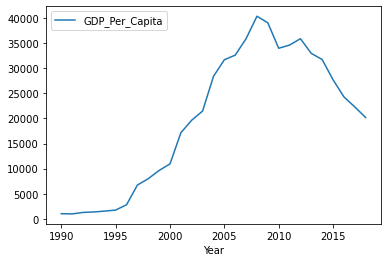

In [126]:
gdp_growth_first.plot(kind='line',x = 'Year', y = 'GDP_Per_Capita')

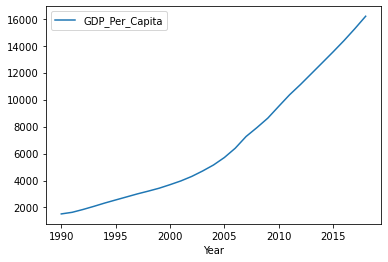

In [144]:
gdp_growth_second.plot(kind='line',x = 'Year', y = 'GDP_Per_Capita')

In [128]:
gdp_growth_top_two = gdp_df[(gdp_df['Country'] == 'Equatorial Guinea') | (gdp_df['Country'] == 'China')].pivot_table(values='GDP_Per_Capita',columns='Country',index='Year').dropna()

In [129]:
gdp_growth_top_two.head()

Country,China,Equatorial Guinea
Year,,
1990,1521.963868,1017.764136
1991,1640.874263,975.558189
1992,1851.315492,1272.159060
1993,2083.952315,1365.588482
1994,2329.474589,1538.475957


In [143]:
print(gdp_growth_top_two)

Country         China  Equatorial Guinea
Year                                    
1990      1521.963868        1017.764136
1991      1640.874263         975.558189
1992      1851.315492        1272.159060
1993      2083.952315        1365.588482
1994      2329.474589        1538.475957
1995      2556.604860        1743.205357
1996      2781.130626        2796.398459
1997      3006.918054        6721.724501
1998      3211.623211        7991.571984
1999      3428.063172        9640.704755
2000      3689.967255       10937.697039
2001      3968.773863       17149.018503
2002      4302.226871       19655.328898
2003      4704.586800       21475.814494
2004      5149.601901       28384.466729
2005      5702.800579       31697.801471
2006      6392.373888       32618.640600
2007      7264.060036       35901.459696
2008      7924.644365       40368.079634
2009      8626.532479       39060.913034
2010      9498.079744       33990.146771
2011     10355.495713       34622.116266
2012     11115.1

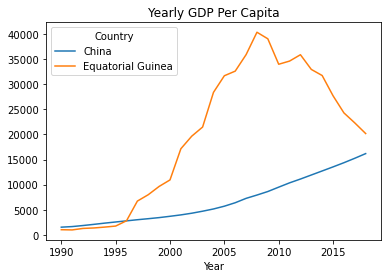

In [145]:
gdp_growth_top_two.plot(title='Yearly GDP Per Capita');